#STEVEN ARTOS
#COMENTARIOS AL FINAL DE COLAB
#CLUSTER

In [204]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [205]:
iris=load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)

In [206]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [207]:
X.columns=['sepal_lenght','sepal_width','pedal_length','petal_width']

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

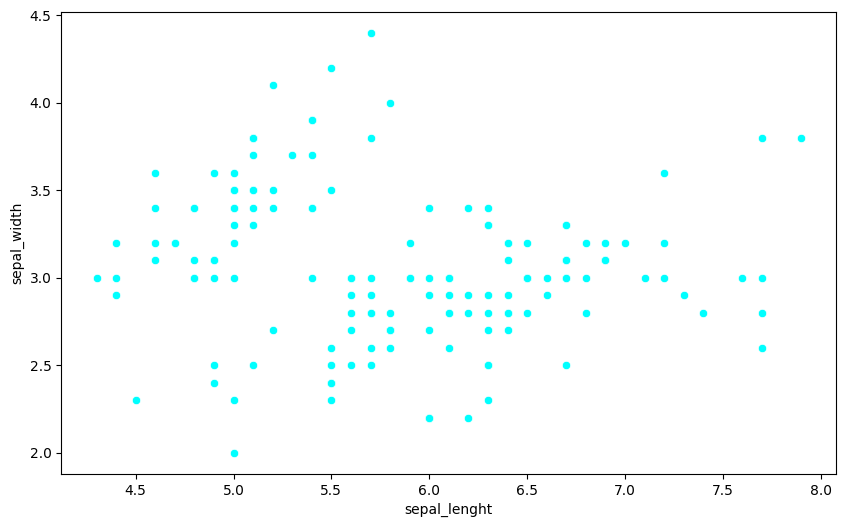

In [208]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X,x='sepal_lenght',y='sepal_width',color='aqua')
plt

In [209]:
#normalizar
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

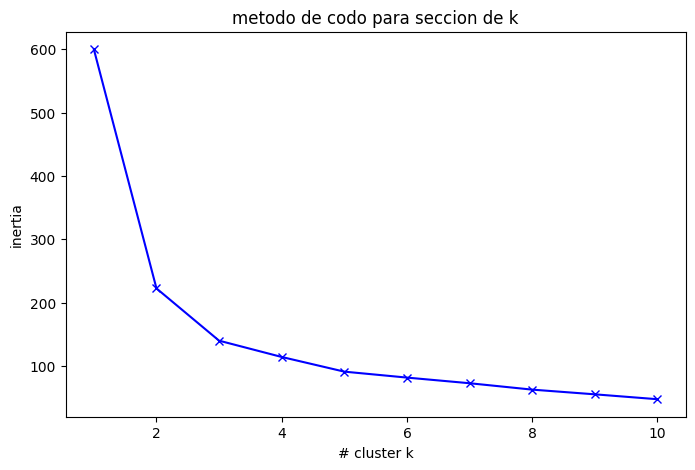

In [210]:
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K,inertia,'bx-')
plt.xlabel('# cluster k')
plt.ylabel('inertia')
plt.title('metodo de codo para seccion de k')
plt.show()

In [211]:
# entrenar modelo
pipeline=Pipeline([
    ('scaler',StandardScaler()),
     ('kmeans',KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42))
     ])
pipeline.fit(X)


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=42))])

In [212]:
labels=pipeline.named_steps['kmeans'].labels_
#agrupar datos en un cluster

In [213]:
X['cluster']=labels

In [214]:
kmeans_model=pipeline.named_steps['kmeans']
centroides_escalados=kmeans_model.cluster_centers_
centroides_escalados=scaler.inverse_transform(centroides_escalados)

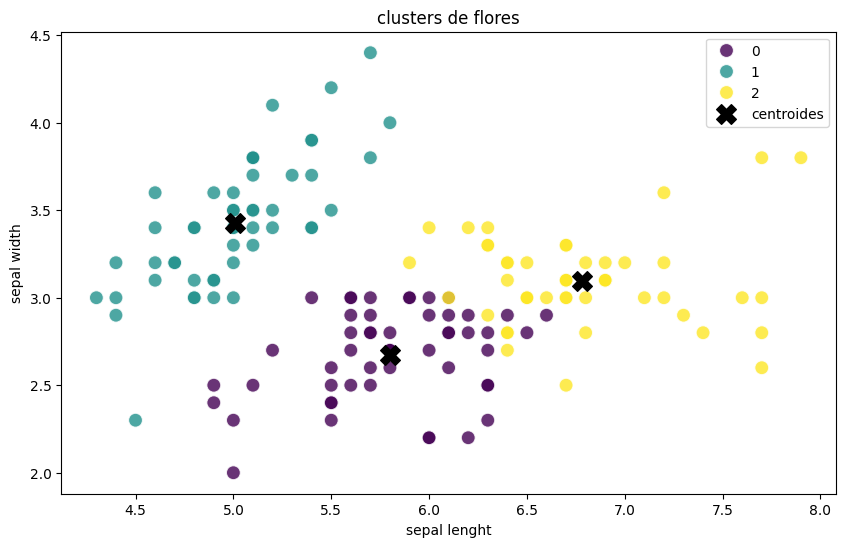

In [215]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['sepal_lenght'],y=X['sepal_width'],hue=X['cluster'],palette='viridis',s=100,alpha=0.8,legend='full')


#centroides
plt.scatter(centroides_escalados[:,0],centroides_escalados[:,1],marker='X',s=200,c='black',label='centroides')

plt.title('clusters de flores')
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#hay 3 clases


#silhouette Score mide la coherencia de los puntos dentro de los clusters. La puntuación oscila entre -1 y 1

#Davis-Bouldin mide relacion promedio dentro de puntos del cluster
#distancia entre cluster
#Index mide la calidad del clustering en función de la compactación dentro de los clusters y la separación entre clusters. La puntuación es no negativa, y un valor más bajo indica un clustering mejor.

In [216]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

silhouette_avg=silhouette_score(X_scaled,labels)
davies_bouldin=davies_bouldin_score(X_scaled,labels)

print(f'silhouette score: {silhouette_avg}')
print(f'davies bouldin score: {davies_bouldin}')


silhouette score: 0.45994823920518635
davies bouldin score: 0.8335949464754338


EJERCICIO 2

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [218]:
url='https://raw.githubusercontent.com/SamikshaBhavsar/k-means/main/data.csv'
data=pd.read_csv(url)

In [219]:
data.head()

,Unnamed: 0,Name,Age,Income($)
0,0,Rob,27,70000
1,1,Michael,29,90000
2,2,Mohan,29,61000
3,3,Ismail,28,60000
4,4,Kory,42,150000


Text(0, 0.5, 'income')

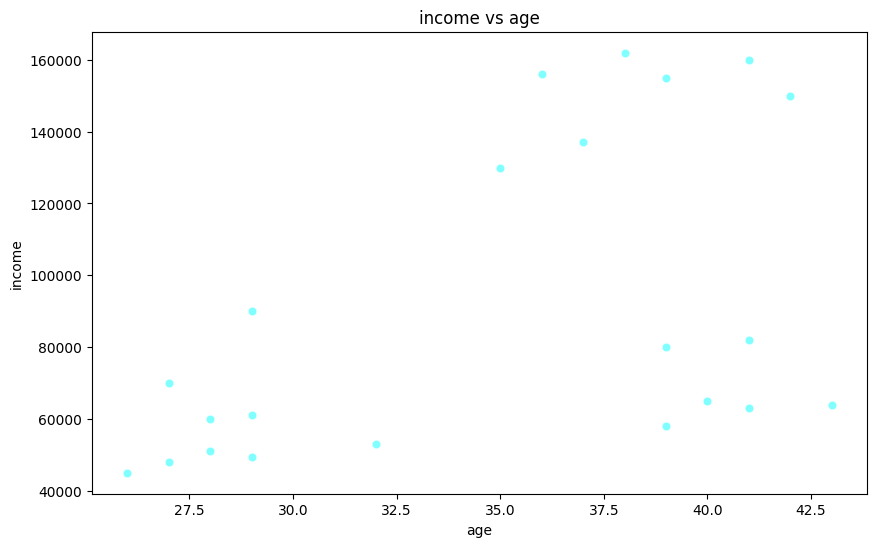

In [220]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Age',y='Income($)',alpha=0.5,color='aqua')
plt.title('income vs age')
plt.xlabel('age')
plt.ylabel('income')

In [221]:
X=data[['Age','Income($)']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

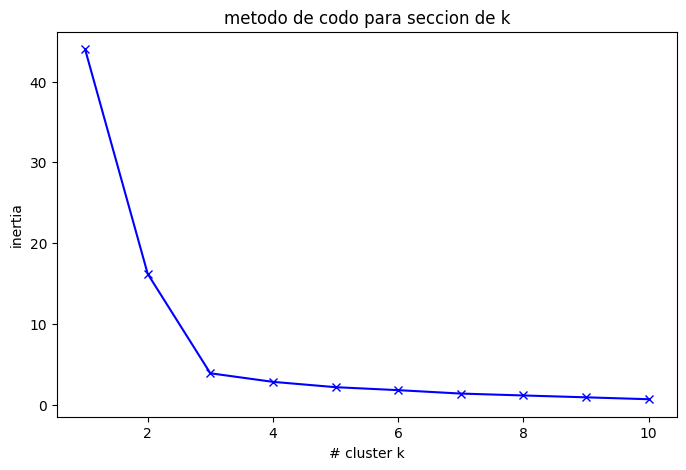

In [222]:
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K,inertia,'bx-')
plt.xlabel('# cluster k')
plt.ylabel('inertia')
plt.title('metodo de codo para seccion de k')
plt.show()

In [223]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
     ('kmeans',KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42))
     ])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=42))])

In [224]:
data['cluster']=pipeline.predict(X)

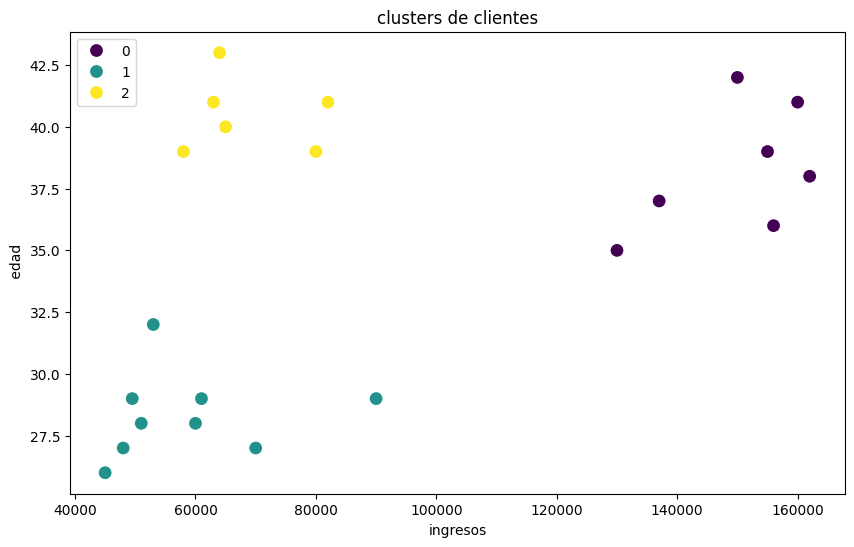

In [225]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='Income($)',y='Age',hue='cluster',data=data,palette='viridis',s=100)
plt.title('clusters de clientes')
plt.xlabel('ingresos')
plt.ylabel(' edad')
plt.legend()
plt.show()

In [226]:
cluster_labels=pipeline.named_steps['kmeans'].labels_


In [227]:
from sklearn.metrics import silhouette_score,davies_bouldin_score


silhouette_avg=silhouette_score(X_scaled,cluster_labels)
davies_bouldin=davies_bouldin_score(X_scaled,cluster_labels)

print(f'silhouette score: {silhouette_avg}')
print(f'davies bouldin score: {davies_bouldin}')


silhouette score: 0.7119890290065082
davies bouldin score: 0.35950689240091394


#COMENTARIOS FINALES

#El clustering es una técnica de aprendizaje no supervisado que busca agrupar datos sin conocer etiquetas previas. Se basa en la idea de que los puntos dentro de un mismo cluster son más similares entre sí que con los de otros clusters.

#se aplicó clustering al dataset Iris para agrupar flores según sus características de sépalos y pétalos. Se normalizaron los datos y, mediante el método del codo, se determinó que el número óptimo de clusters era 3. Se entrenó un modelo K-Means con k=3, asignando etiquetas a cada punto y visualizando los grupos con sus respectivos centroides. La evaluación con Silhouette Score (0.4599) y Davies-Bouldin Score (0.8336) indicó una segmentación aceptable. Como conclusión, se identificaron tres grupos bien definidos, lo que coincide con las tres especies de flores en el datase

# Se realizó clustering en un dataset de clientes utilizando las variables de edad e ingresos. Tras normalizar los datos, se aplicó el método del codo para determinar que el mejor número de clusters era también k=3. Se entrenó un modelo K-Means y se generó una visualización que mostró cómo los clientes fueron agrupados según sus ingresos y edades. Este análisis permitió segmentar a los clientes en tres categorías, lo que puede ser útil para estrategias de marketing o análisis de comportamiento.

#Los resultados mostraron una segmentación clara y útil, con métricas de evaluación como Silhouette Score y Davies-Bouldin Score, que indicaron una buena separación de los grupos. Este análisis demuestra la utilidad del clustering para identificar patrones ocultos en los datos, lo que puede ser aplicado en diversas áreas como la clasificación de especies, la segmentación de clientes o la toma de decisiones estratégicas basadas en datos.
